<a href="https://colab.research.google.com/github/DangKhoa8422/FuzzyLogic/blob/main/FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=7f6daccd9fe6f95f76fc2e3f9028a54c0f740f448c41d3ca74bd0df46fda9803
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


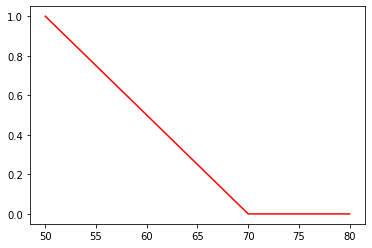

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x = np.array(50,80,1)
slow = fuzz.tumf(x,[50,50,70])

plt.figure()
plt.plot(x, slow, 'r', linewidth = 15, label = 'slove')

19.998048279404216


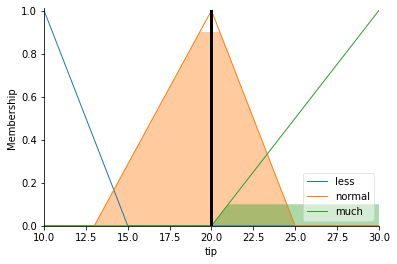

In [ ]:
import numpy as np 
import skfuzzy as fuzz
from skfuzzy import control as a

food = a.Antecedent(np.arange(0,11, 1), 'food')
sv = a.Antecedent(np.arange(0, 11, 1), 'service')
tip = a.Consequent(np.arange(10, 31, 1), 'tip')

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['avg'] = fuzz.trimf(food.universe,[0, 5, 10])
food['good'] =  fuzz.trimf(food.universe,[5, 10 ,10])

sv['poor'] = fuzz.trimf(sv.universe,[0, 0, 0])
sv['avg'] = fuzz.trimf(sv.universe,[0, 5, 10])
sv['good'] = fuzz.trimf(sv.universe, [5, 10, 10])

tip['less'] = fuzz.trimf(tip.universe, [10, 10, 15])
tip['normal'] = fuzz.trimf(tip.universe, [13,20, 25])
tip['much'] = fuzz.trimf(tip.universe, [20, 30, 30])

rule1=a.Rule(food['poor'] & sv['poor'],tip['less'])
rule2=a.Rule(food['poor'] & sv['avg'],tip['less'])
rule3=a.Rule(food['poor'] & sv['good'],tip['normal'])
rule4=a.Rule(food['avg'] & sv['poor'],tip['less'])
rule5=a.Rule(food['avg'] & sv['avg'],tip['normal'])
rule6=a.Rule(food['avg'] & sv['good'],tip['much'])
rule7=a.Rule(food['good'] & sv['poor'],tip['less'])
rule8=a.Rule(food['good'] & sv['avg'],tip['much'])
rule9=a.Rule(food['good'] & sv['good'],tip['much'])

tipping_a=a.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = a.ControlSystemSimulation(tipping_a)
tipping.input['food'] = 5.5
tipping.input['service'] = 5.5
tipping.compute()
print(tipping.output['tip'])

tip.view(sim = tipping)


11.66666666666666


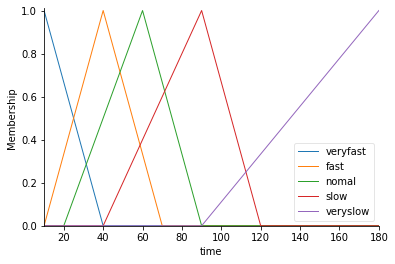

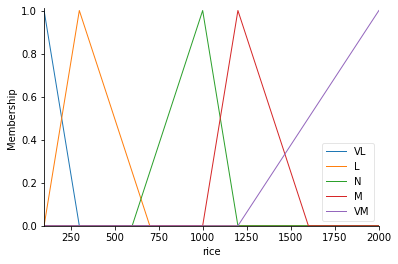

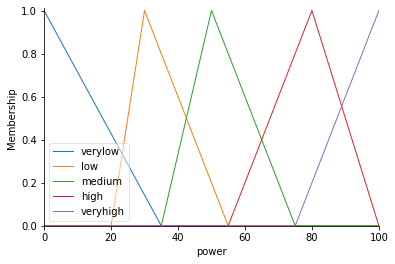

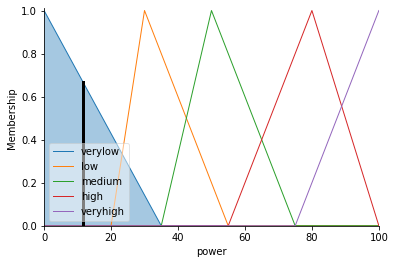

In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as crt

time= crt.Antecedent(np.arange(10,181,1),'time')
rice= crt.Antecedent(np.arange(100,2001,1),'rice')
power=crt.Consequent(np.arange(0,101,1),'power')

time['veryfast']=fuzz.trimf(time.universe,[10,10,40])
time['fast']=fuzz.trimf(time.universe,[10,40,70])
time['nomal']=fuzz.trimf(time.universe,[20,60,90])
time['slow']=fuzz.trimf(time.universe,[40,90,120])
time['veryslow']=fuzz.trimf(time.universe,[90,180,180])

rice['VL']=fuzz.trimf(rice.universe,[100,100,300])
rice['L']=fuzz.trimf(rice.universe,[100,300,700])
rice['N']=fuzz.trimf(rice.universe,[600,1000,1200])
rice['M']=fuzz.trimf(rice.universe,[1000,1200,1600])
rice['VM']=fuzz.trimf(rice.universe,[1200,2000,2000])

power['verylow']=fuzz.trimf(power.universe,[0,0,35])
power['low']=fuzz.trimf(power.universe,[20,30,55])
power['medium']=fuzz.trimf(power.universe,[35,50,75])
power['high']=fuzz.trimf(power.universe,[55,80,100])
power['veryhigh']=fuzz.trimf(power.universe,[75,100,100])

time.view()
rice.view()
power.view()

rule1=crt.Rule(time['veryfast'] & rice['VL'],power['verylow'])
rule2=crt.Rule(time['veryfast'] & rice['L'],power['medium'])
rule3=crt.Rule(time['veryfast'] & rice['N'],power['medium'])
rule4=crt.Rule(time['veryfast'] & rice['M'],power['high'])
rule5=crt.Rule(time['veryfast'] & rice['VM'],power['veryhigh'])

rule6=crt.Rule(time['fast'] & rice['VL'],power['low'])
rule7=crt.Rule(time['fast'] & rice['L'],power['low'])
rule8=crt.Rule(time['fast'] & rice['N'],power['medium'])
rule9=crt.Rule(time['fast'] & rice['M'],power['high'])
rule10=crt.Rule(time['fast'] & rice['VM'],power['veryhigh'])

rule11=crt.Rule(time['nomal'] & rice['VL'],power['low'])
rule12=crt.Rule(time['nomal'] & rice['L'],power['medium'])
rule13=crt.Rule(time['nomal'] & rice['N'],power['medium'])
rule14=crt.Rule(time['nomal'] & rice['M'],power['medium'])
rule15=crt.Rule(time['nomal'] & rice['VM'],power['high'])

rule16=crt.Rule(time['slow'] & rice['VL'],power['verylow'])
rule17=crt.Rule(time['slow'] & rice['L'],power['verylow'])
rule18=crt.Rule(time['slow'] & rice['N'],power['low'])
rule19=crt.Rule(time['slow'] & rice['M'],power['medium'])
rule20=crt.Rule(time['slow'] & rice['VM'],power['medium'])

rule21=crt.Rule(time['veryslow'] & rice['VL'],power['verylow'])
rule22=crt.Rule(time['veryslow'] & rice['L'],power['verylow'])
rule23=crt.Rule(time['veryslow'] & rice['N'],power['verylow'])
rule24=crt.Rule(time['veryslow'] & rice['M'],power['low'])
rule25=crt.Rule(time['veryslow'] & rice['VM'],power['low'])

power_crt=crt.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
power1=crt.ControlSystemSimulation(power_crt)

power1.input['time']=10
power1.input['rice']=100
power1.compute()

print(power1.output['power'])
power.view(sim = power1)